In [1]:
version()

'SageMath version 10.3, Release Date: 2024-03-19'

In [2]:
%display latex

In [4]:
phi0 = var('phi0', latex_name=r'\phi_0')
phi0

phi0

In [64]:
G = var('G', latex_name=r'G')
M = var('M', latex_name=r'M')
c = var('c', latex_name=r'c')
c=1
Q = var('Q', latex_name=r'Q')
e0 = var('e0', latex_name=r'\epsilon_0')
p = var('pi', latex_name=r'\pi')
rs = var('rs', latex_name =r'r_s')
rq = var('rq', latex_name =r'r_Q')
rs = 2*G*Q/c^2
M==Q
rs

2*G*Q

In [65]:
rq = Q^2*G/(4*p*e0*c^4)
rq

1/4*G*Q^2/(e0*pi)

In [66]:
Mn = Manifold(4, 'Mn', structure='Lorentzian')
print(Mn)

4-dimensional Lorentzian manifold Mn


In [67]:
XS.<t,r,th,ph> = Mn.chart(r't r:(0,+oo) th:(0,pi):\theta ph:(0,2*pi):\phi')
XS

Chart (Mn, (t, r, th, ph))

In [68]:
XS.coord_range()

t: (-oo, +oo); r: (0, +oo); th: (0, pi); ph: (0, 2*pi)

In [69]:
g = Mn.metric()
g[0,0] = (1- rs/r + rq^2/r^2) 
g[1,1] = (1- rs/r + rq^2/r^2)
g[2,2] = r^2
g[3,3] = r^2*sin(th)^2
g.display()

g = (-2*G*Q/r + 1/16*G^2*Q^4/(e0^2*pi^2*r^2) + 1) dt⊗dt + (-2*G*Q/r + 1/16*G^2*Q^4/(e0^2*pi^2*r^2) + 1) dr⊗dr + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

In [70]:
Q = var('Q', latex_name=r'Q')
c=1
g.display()

g = (-2*G*Q/r + 1/16*G^2*Q^4/(e0^2*pi^2*r^2) + 1) dt⊗dt + (-2*G*Q/r + 1/16*G^2*Q^4/(e0^2*pi^2*r^2) + 1) dr⊗dr + r^2 dth⊗dth + r^2*sin(th)^2 dph⊗dph

In [100]:
XN.<t,P,th,ph> = Mn.chart(r't P th:(0,pi):\theta ph:(0,2*pi):\phi',
                         coord_restrictions=lambda t,P,th,ph: P>0)
XN

Chart (Mn, (t, P, th, ph))

In [101]:
XN.coord_range()

t: (-oo, +oo); P: (0, +oo); th: (0, pi); ph: (0, 2*pi)

In [102]:
XS_to_XN = XS.transition_map(XN, [t, r-Q , th, ph])
XS_to_XN.display()

t = t
P = -Q + r
th = th
ph = ph

In [103]:
XS_to_XN.inverse().display()

t = t
r = P + Q
th = th
ph = ph

In [104]:
g.display(XN)

g = -1/16*(32*G*P*Q*e0^2*pi^2 + 32*G*Q^2*e0^2*pi^2 - G^2*Q^4 - 16*P^2*e0^2*pi^2 - 32*P*Q*e0^2*pi^2 - 16*Q^2*e0^2*pi^2)/((P + Q)^2*e0^2*pi^2) dt⊗dt - 1/16*(32*G*P*Q*e0^2*pi^2 + 32*G*Q^2*e0^2*pi^2 - G^2*Q^4 - 16*P^2*e0^2*pi^2 - 32*P*Q*e0^2*pi^2 - 16*Q^2*e0^2*pi^2)/((P + Q)^2*e0^2*pi^2) dP⊗dP + (P + Q)^2 dth⊗dth + (P + Q)^2*sin(th)^2 dph⊗dph

In [105]:
g.apply_map(factor, frame=XN.frame(), chart=XN,
            keep_other_components=True)
g.display(XN)

g = -1/16*(32*G*P*Q*e0^2*pi^2 + 32*G*Q^2*e0^2*pi^2 - G^2*Q^4 - 16*P^2*e0^2*pi^2 - 32*P*Q*e0^2*pi^2 - 16*Q^2*e0^2*pi^2)/((P + Q)^2*e0^2*pi^2) dt⊗dt - 1/16*(32*G*P*Q*e0^2*pi^2 + 32*G*Q^2*e0^2*pi^2 - G^2*Q^4 - 16*P^2*e0^2*pi^2 - 32*P*Q*e0^2*pi^2 - 16*Q^2*e0^2*pi^2)/((P + Q)^2*e0^2*pi^2) dP⊗dP + (P + Q)^2 dth⊗dth + (P + Q)^2*sin(th)^2 dph⊗dph

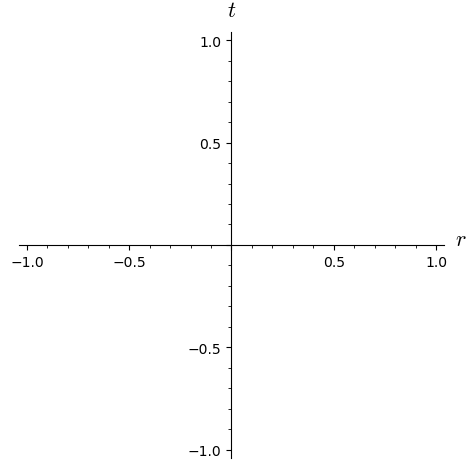

In [115]:
transformed_metric = g[1,1]
plot_coords = (transformed_metric,)
graph = XN.plot(XS, ambient_coords=(r,t), fixed_coords={t:+oo, th: pi/Integer(2), ph: pi}, 
                number_values=17, plot_points=200, color='green', 
                style={P: '--', Q: '-'}, thickness=1.5)
graph

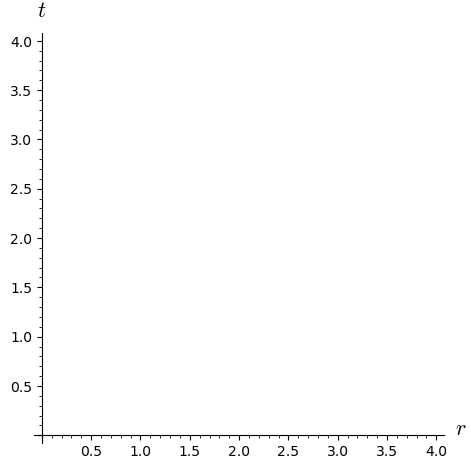

In [110]:
show(graph, xmin=0, xmax=4, ymin=0, ymax=4, aspect_ratio=1)

In [112]:
M1 = Manifold(4, 'M1')
X.<t,x,y,z> = M1.chart()
v = M1.vector_field((t/8)^2, -t*y/4, t*x/4, t*z/4, name='v')
v.display()

v = 1/64*t^2 ∂/∂t - 1/4*t*y ∂/∂x + 1/4*t*x ∂/∂y + 1/4*t*z ∂/∂z

In [113]:
v.plot(ambient_coords=(x, y, z), fixed_coords={t: 1},         
       number_values=4)

Graphics3d Object

In [116]:
v.plot(ambient_coords=(x, y, t), fixed_coords={z: 0},         
       ranges={x: (-2,2), y: (-2,2), t: (-1, 4)},
       number_values=4)

Graphics3d Object

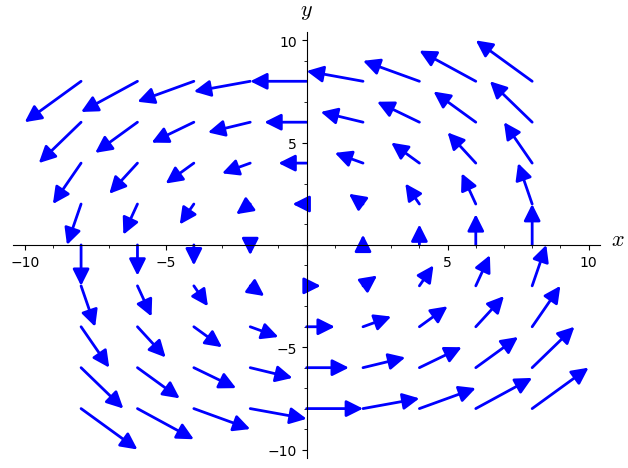

In [117]:
v.plot(ambient_coords=(x, y), fixed_coords={t: 1, z: 0})      

In [121]:
S2 = Manifold(2, 'S^2')
U = S2.open_subset('U') 
XS.<th,ph> = U.chart(r'th:(0,pi):\theta ph:(0,2*pi):\phi')
R3 = Manifold(3, 'R^3')
X3.<x,y,z> = R3.chart()
F = S2.diff_map(R3, {(XS, X3): [sin(th)*cos(ph),
                      sin(th)*sin(ph), cos(th)]}, name='F')
F.display()                                                    

F: S^2 → R^3
on U: (th, ph) ↦ (x, y, z) = (cos(ph)*sin(th), sin(ph)*sin(th), cos(th))

In [125]:
v = XS.frame()[1] ;
v

Vector field ∂/∂ph on the Open subset U of the 2-dimensional differentiable manifold S^2

In [127]:
v.plot.options

{'max_range': 8, 'scale': 1, 'color': 'blue'}

In [128]:
v.plot.options['color'] = 'red'

In [129]:
v.plot.reset()

In [136]:
ranges = {x: (-1,1)}
graph_v = v.plot(chart=X3, mapping=F, label_axes=True)               
graph_S2 = XS.plot(chart=X3, mapping=F, number_values=9)              
graph_v + graph_S2 

TypeError: cannot evaluate symbolic expression numerically

In [141]:

# Define the manifolds, charts, and the map
S2 = Manifold(2, 'S^2')
U = S2.open_subset('U') 
XS.<th,ph> = U.chart(r'th:(0,pi):\theta ph:(0,2*pi):\phi')

R3 = Manifold(3, 'R^3')
X3.<x,y,z> = R3.chart()
F = S2.diff_map(R3, {(XS, X3): [sin(th)*cos(ph), sin(th)*sin(ph), cos(th)]}, name='F')

# Display the differential map
F.display()

# Define the vector field to plot
v = XS.frame()[1]

try:
    # You must specify ambient_coords if your field's base and plot space differ
    graph_v = v.plot(chart=X3, mapping=F, ambient_coords=(x, y, z),
                     fixed_coords={th: pi/4, ph: pi/2}, label_axes=True,
                     number_values=1)  # Assuming we use a uniform count across all dimensions
    graph_S2 = XS.plot(chart=X3, mapping=F, number_values=9)
    combined_graph = graph_v + graph_S2
    combined_graph.show()
except Exception as e:
    print(f"Error during plotting: {e}")

Error during plotting graph_v: tuple index out of range
Error during plotting graph_S2: cannot evaluate symbolic expression numerically


In [142]:
from sage.all import pi, sin, cos, Manifold, RealField

# Define the manifolds and mappings
S2 = Manifold(2, 'S^2')
U = S2.open_subset('U')
XS.<th, ph> = U.chart(r'th:(0,pi):\theta ph:(0,2*pi):\phi')

R3 = Manifold(3, 'R^3')
X3.<x, y, z> = R3.chart()
F = S2.diff_map(R3, {(XS, X3): [sin(th)*cos(ph), sin(th)*sin(ph), cos(th)]}, name='F')

# Ensure fixed coordinates are evaluated numerically
RR = RealField(53)  # higher precision field
fixed_coords = {th: RR(pi/4), ph: RR(pi/2)}

# Isolated plotting to diagnose issues
try:
    graph_v = v.plot(chart=X3, mapping=F, ambient_coords=(x, y, z), fixed_coords=fixed_coords, label_axes=True)
    graph_v.show()
except Exception as e:
    print(f"Error during plotting graph_v: {e}")

try:
    graph_S2 = XS.plot(chart=X3, mapping=F, number_values=9)
    graph_S2.show()
except Exception as e:
    print(f"Error during plotting graph_S2: {e}")


Error during plotting graph_v: the Vector field ∂/∂ph on the Open subset U of the 2-dimensional differentiable manifold S^2 does not take its values on the domain of the Differentiable map F from the 2-dimensional differentiable manifold S^2 to the 3-dimensional differentiable manifold R^3
Error during plotting graph_S2: cannot evaluate symbolic expression numerically
